In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(-1,28,28,1).astype('float32') /255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32') /255.0
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2)

datagen.fit(X_train)

In [11]:
# CNN
model = Sequential()
model.add(Conv2D(filters=4,
                 kernel_size = (3,3),
                 strides = (1,1),
                 padding = 'same',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8,
                 kernel_size = (3,3),
                 strides = (1,1),
                 padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(18))
model.add(Dense(10,activation='softmax'))

c:\AI_ML_fresh\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
history = model.fit(datagen.flow(X_train,y_train,batch_size=32),epochs=10,validation_data=(X_test,y_test))

c:\AI_ML_fresh\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8078 - loss: 0.6133 - val_accuracy: 0.9471 - val_loss: 0.1789
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9087 - loss: 0.3057 - val_accuracy: 0.9656 - val_loss: 0.1150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9196 - loss: 0.2676 - val_accuracy: 0.9610 - val_loss: 0.1249
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9248 - loss: 0.2465 - val_accuracy: 0.9673 - val_loss: 0.1061
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9305 - loss: 0.2361 - val_accuracy: 0.9717 - val_loss: 0.0911
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9310 - loss: 0.2291 - val_accuracy: 0.9671 - val_loss: 0.1097
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9337 - loss: 0.2189 - val_accuracy: 0.9721 - val_loss: 0.0931
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9359 - 

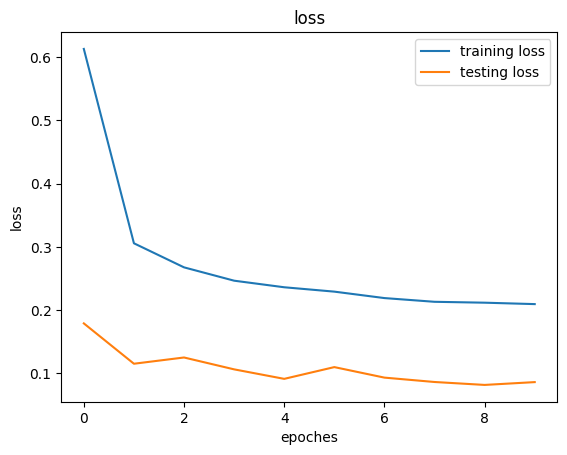

In [15]:
plt.plot(history.history['loss'],label  = 'training loss')
plt.plot(history.history['val_loss'],label  = 'testing loss')
plt.title("loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 18)             │         5,202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,186 (67.14 KB)

 Trainable params: 5,728 (22.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,458 (44.76 KB)

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.0860


[0.08596020936965942, 0.9731000065803528]